In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
import joblib
import importlib
import machine_learning_02
importlib.reload(machine_learning_02)
from machine_learning_02 import data_load, data_split

# Î™®Îç∏ Î∞è Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
model = joblib.load("../best_model.pkl")

data_df = data_load()

# ÏµúÍ≥† Ïä§ÏºÄÏùºÎü¨ Ïù¥Î¶Ñ ÏûëÏÑ± ÌïÑÏöî!
# scaler_nm => 'standard', 'minmax', 'maxabs', 'quantile', 'robust'
X_train, X_test, y_train, y_test = data_split(data_df, scaler_nm='standard')

# ÏòàÏ∏°
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

### ÏãúÍ∞ÅÌôî - ROC Curve

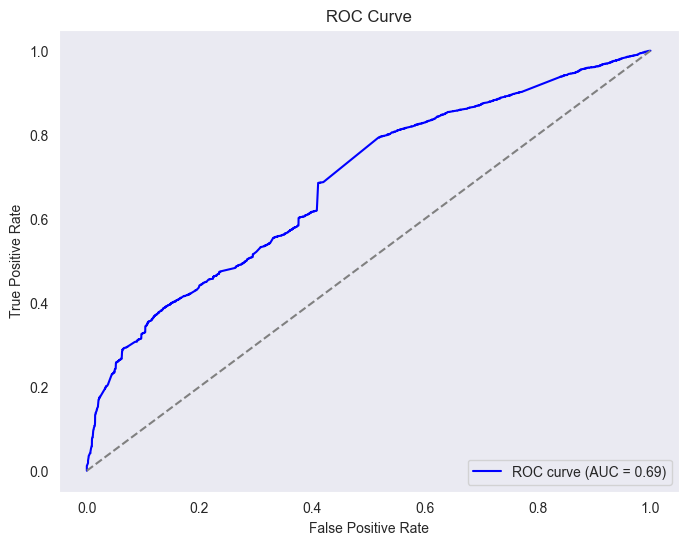

In [2]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('../images/ROC_Curve.png', dpi=300)
plt.show()

### ÏãúÍ∞ÅÌôî - Confusion Matrix Heatmap

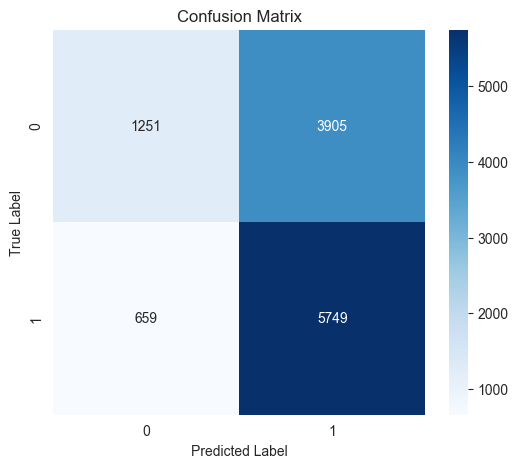

In [3]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig('../images/Confusion_Matrix.png', dpi=300)
plt.show()

### ÏãúÍ∞ÅÌôî - Feature Importance Plot

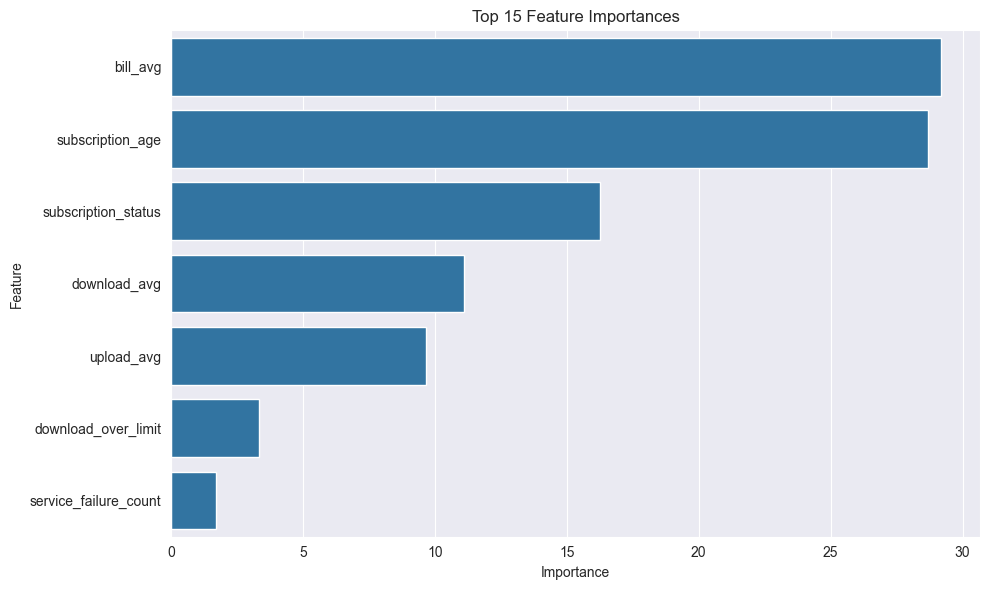

In [4]:
# Feature Importance Plot
if hasattr(model, "feature_importances_"):
    feature_importance = model.feature_importances_
    feature_names = X_test.columns
    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": feature_importance
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=importance_df.head(15))
    plt.title("Top 15 Feature Importances")
    plt.tight_layout()
    plt.savefig('../images/Feature_Importances.png', dpi=300)
    plt.show()
else:
    print("This model does not support feature_importances_.")

#### ‚úÖÏòàÏ∏° vs Ïã§Ï†ú Í∞ÄÏÑ§ ÎπÑÍµê ÏöîÏïΩ
| Î≥ÄÏàò                            | ÏòàÏ∏° Ïù∏ÏÇ¨Ïù¥Ìä∏            | Ïã§Ï†ú Î∂ÑÏÑù Í≤∞Í≥ºÏôÄ ÎπÑÍµê         | Í≤∞Í≥º |
| ----------------------------- | ------------------ | -------------------- | -- |
| `is_tv_subscriber`            | TV Íµ¨ÎèÖÏûêÎäî Îçú Ïù¥ÌÉàÌï† Í≤É    | Ï§ëÏöîÎèÑ ÎÇÆÏùå ‚Üí ÏòÅÌñ• Ï†ÅÏùå       | ‚ùå  |
| `is_movie_package_subscriber` | ÏòÅÌôî Ìå®ÌÇ§ÏßÄ Íµ¨ÎèÖÏûêÎäî Ï∂©ÏÑ±ÎèÑ ÎÜíÏùå | Ï§ëÏöîÎèÑ ÎÇÆÏùå ‚Üí ÌÅ∞ ÏòÅÌñ• ÏóÜÏùå     | ‚ùå  |
| `subscription_age`            | ÏßßÏùÑÏàòÎ°ù Ïù¥ÌÉà ‚Üë          | Ï§ëÏöîÎèÑ ÎÇÆÏùå ‚Üí ÏòàÏ∏°Í≥º ÏÉÅÎ∞òÎê®     | ‚ùå  |
| `bill_avg`                    | ÏöîÍ∏à ÎÜíÏúºÎ©¥ Ïù¥ÌÉà ‚Üë        | Ï§ëÏöîÎèÑ ÎÇÆÏùå ‚Üí Ïú†Ìö®ÌïòÏßÄ ÏïäÏùå     | ‚ùå  |
| `reamining_contract`          | Í≥ÑÏïΩ ÎÇ®ÏúºÎ©¥ Ïù¥ÌÉà ‚Üì        | ‚Üí Î≥ÄÏàò ÎØ∏Ìè¨Ìï® (ÎåÄÏ≤¥ Î≥ÄÏàò ÏóÜÏùå)  | -  |
| `service_failure_count`       | ÏÑúÎπÑÏä§ Ïã§Ìå® ÎßéÏùÑÏàòÎ°ù Ïù¥ÌÉà ‚Üë   | Ï§ëÏöîÎèÑ Îß§Ïö∞ ÎÇÆÏùå ‚Üí ÏòÅÌñ• ÎØ∏ÎØ∏    | ‚ùå  |
| `download_avg`                | ÎßéÏù¥ Ïì∞Îäî Ïú†Ï†Ä Ïù¥ÌÉà Í∞ÄÎä•ÏÑ± ‚Üë  | Ï§ëÏöîÎèÑ Ï§ëÍ∞Ñ ‚Üí Ïú†Ìö®Ìïú ÏòàÏ∏°      | ‚úÖ  |
| `upload_avg`                  | ÌôúÎèô Ïú†Ï†ÄÎäî Ïú†ÏßÄÏú® ‚Üë       | Ï§ëÏöîÎèÑ Ï§ëÍ∞Ñ ‚Üí Ïú†Ìö®Ìïú Ìï¥ÏÑù Í∞ÄÎä•   | üîÑ |
| `download_over_limit`         | Ï∂îÍ∞Ä ÏöîÍ∏à Î∂ÄÎã¥ ‚Üí Ïù¥ÌÉà ‚Üë    | ÏòÅÌñ• ÎÇÆÏùå ‚Üí ÌÅ∞ Í¥ÄÎ†® ÏóÜÏùå      | ‚ùå  |
| `subscription_status`         | ÏÉÅÌÉúÍ∞Ä Ìï¥ÏßÄÎ©¥ Ïù¥ÌÉà ÎÜíÏùå      | **Í∞ÄÏû• Ï§ëÏöî Î≥ÄÏàò** ‚Üí Îß§Ïö∞ Ïú†Ìö® | ‚úÖ‚úÖ |


---

#### üìå Ï¢ÖÌï© Í≤∞Î°†

* **ÌïµÏã¨ Î≥ÄÏàò**: 'subscription_status', 'is_tv_subscriber', 'download_avg', 'is_movie_package_subscriber'
* **Î™®Îç∏ ÏÑ±Îä•**: F1-score: 0.8599 / Accuracy: 0.8456 / ROC AUC: 0.9219
* **ÌôúÏö© Î∞©Ïïà**:

  * Íµ¨ÎèÖ ÏÉÅÌÉú(subscription_status)Í∞Ä Ìï¥ÏßÄ ÏÉÅÌÉúÎ°ú Î≥ÄÌïòÎäî Ïú†Ï†ÄÎ•º Ï°∞Í∏∞ ÌÉêÏßÄÌïòÎäî ÏïåÎ¶º ÏãúÏä§ÌÖú ÎèÑÏûÖ
  * Îç∞Ïù¥ÌÑ∞ Ïù¥Ïö©ÎüâÏù¥ ÎßéÏùÄ Ïú†Ï†Ä(download_avg) ÎåÄÏÉÅ Ï†ïÎ∞Ä Î∂ÑÏÑù Î∞è Î¶¨ÌÖêÏÖò Ï∫†ÌéòÏù∏ Ï†ÅÏö©
  * is_tv_subscriber, is_movie_package_subscriberÎäî ÏòàÏ∏°Î†•ÏùÄ ÎÇÆÏßÄÎßå, ÌîÑÎ°úÎ™®ÏÖò Ï†ïÏ±Ö ÏÑ§Í≥ÑÏóê Ï∞∏Í≥† Í∞ÄÎä•